In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt


In [2]:
model = torch.load('data_storage/FCNN_L16.pth')
model

OrderedDict([('fc1.weight',
              tensor([[-0.0343,  0.0455,  0.0608,  ..., -0.0343, -0.0541, -0.0139],
                      [ 0.0104, -0.0732, -0.0045,  ...,  0.0303,  0.1923,  0.0070],
                      [-0.0894, -0.0040,  0.1340,  ...,  0.0207, -0.0685,  0.0656],
                      ...,
                      [-0.0297,  0.0247,  0.0785,  ..., -0.0514, -0.0206, -0.0251],
                      [ 0.0331, -0.0580, -0.0115,  ..., -0.0152,  0.1017,  0.0908],
                      [-0.0765, -0.0816, -0.1115,  ..., -0.0367, -0.0493, -0.0595]])),
             ('fc1.bias',
              tensor([-0.4011,  0.2954, -0.3690,  0.5780,  0.1038, -0.3473,  0.3174, -0.4599,
                       0.5158,  0.1276,  0.4326, -0.0822, -0.0782, -0.1400,  0.2797, -0.1541,
                       0.2873,  0.3108,  0.4644,  0.1449,  0.1820, -0.2982,  0.1681, -0.3459,
                      -0.3038,  0.1777, -0.3011,  0.3983,  0.2538,  0.2591, -0.2224,  0.2603,
                       0.1791,  0.61

In [5]:
# fc1.weightの重みテンソルを取得
fc1_weight = model['fc1.weight']
fc1_weight

tensor([[-0.0343,  0.0455,  0.0608,  ..., -0.0343, -0.0541, -0.0139],
        [ 0.0104, -0.0732, -0.0045,  ...,  0.0303,  0.1923,  0.0070],
        [-0.0894, -0.0040,  0.1340,  ...,  0.0207, -0.0685,  0.0656],
        ...,
        [-0.0297,  0.0247,  0.0785,  ..., -0.0514, -0.0206, -0.0251],
        [ 0.0331, -0.0580, -0.0115,  ..., -0.0152,  0.1017,  0.0908],
        [-0.0765, -0.0816, -0.1115,  ..., -0.0367, -0.0493, -0.0595]])

In [6]:
# NumPy配列に変換
fc1_weightt_np = fc1_weight.numpy()

In [10]:
fc1_weightt_np.shape

(100, 256)

In [11]:
# fc2.weightの重みテンソルを取得
fc2_weight = model['fc2.weight']
fc2_weight

tensor([[-1.8566e-02,  2.3293e-02,  1.8221e-02,  ..., -5.4906e-02,
          1.7817e-01, -3.7320e-02],
        [ 7.8968e-03, -1.3095e-01, -3.8560e-03,  ..., -9.4009e-02,
          2.0400e-01,  1.0673e-01],
        [ 1.0156e-01,  3.9623e-04, -1.4019e-01,  ..., -4.1776e-02,
         -2.6997e-01,  1.6062e-01],
        ...,
        [-1.2475e-01,  9.0516e-02,  2.8741e-01,  ..., -1.2610e-01,
         -4.9193e-01, -2.4723e-01],
        [-5.5478e-01, -1.8870e-01, -5.1128e-01,  ..., -3.6345e-01,
         -8.2740e-02, -4.5647e-01],
        [-5.9093e-01,  2.3789e-01, -5.6952e-01,  ...,  3.5810e-01,
         -1.5141e-01, -2.3670e-01]])

In [12]:
# NumPy配列に変換
fc2_weightt_np = fc2_weight.numpy()

In [13]:
fc2_weightt_np.shape

(25, 100)

In [14]:
# データを転置
fc2_weightt_np_T = fc2_weightt_np.T

In [15]:
fc2_weightt_np_T

array([[-1.85663085e-02,  7.89676979e-03,  1.01561561e-01, ...,
        -1.24752924e-01, -5.54775059e-01, -5.90928555e-01],
       [ 2.32932586e-02, -1.30951330e-01,  3.96233518e-04, ...,
         9.05161649e-02, -1.88703284e-01,  2.37890914e-01],
       [ 1.82212126e-02, -3.85595090e-03, -1.40192792e-01, ...,
         2.87409276e-01, -5.11277616e-01, -5.69521308e-01],
       ...,
       [-5.49061745e-02, -9.40092877e-02, -4.17763479e-02, ...,
        -1.26096070e-01, -3.63447487e-01,  3.58102381e-01],
       [ 1.78171903e-01,  2.04003111e-01, -2.69966006e-01, ...,
        -4.91931885e-01, -8.27398151e-02, -1.51412949e-01],
       [-3.73204574e-02,  1.06727831e-01,  1.60619691e-01, ...,
        -2.47232035e-01, -4.56473619e-01, -2.36697450e-01]], dtype=float32)

In [16]:
fc2_weightt_np_T.shape

(100, 25)

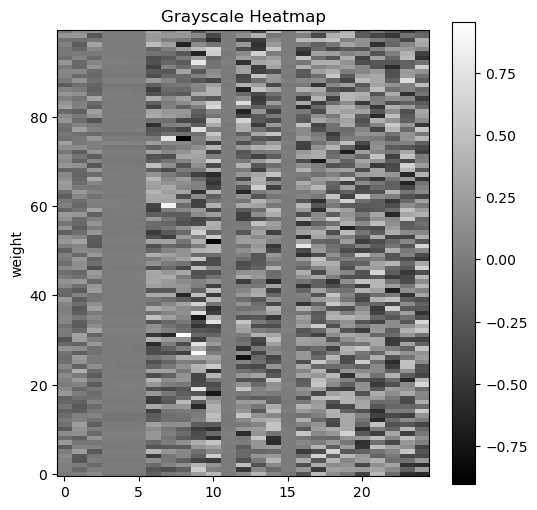

In [17]:
# ヒートマップをプロット（白黒）
plt.figure(figsize=(6, 6))
plt.imshow(fc2_weightt_np_T, cmap='gray', interpolation='nearest', aspect=0.30, origin='lower')
plt.colorbar()
plt.title('Grayscale Heatmap')


# x軸とy軸に名前を付ける
plt.ylabel('weight')

plt.show()

In [18]:
fc_weight_np_square_sum = np.sum(fc2_weightt_np_T, axis=0)
fc_weight_np_square_sum

array([ 9.5799321e-01, -2.2409234e+00, -4.9736387e-01, -1.2076814e-01,
       -1.2197820e-01, -1.4479834e-01, -3.1232350e+00,  4.7704315e-01,
       -1.4246361e+00,  1.6579885e+00,  3.0143955e+00, -2.5268672e-03,
       -2.7331560e+00, -6.3333666e-01,  3.4854681e+00, -1.0017884e-01,
        1.7313255e+00,  3.7192419e+00,  5.3177271e+00,  5.4647865e+00,
       -4.1775522e+00, -5.3256339e-01, -6.7642765e+00, -2.9781344e+00,
        5.1450092e-01], dtype=float32)

In [20]:
fc_weight_np_square_sum.shape

(25,)

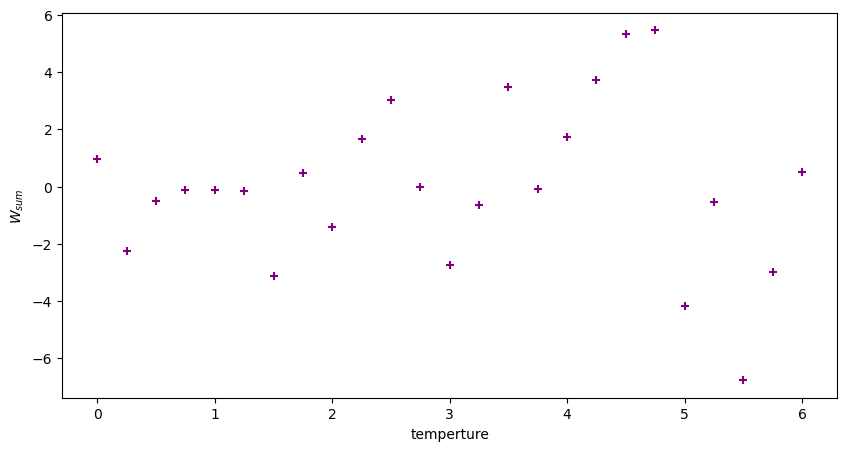

In [19]:
x = [x*0.25 for x in range(len(fc_weight_np_square_sum))]
y = fc_weight_np_square_sum

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x, y, marker='+', color='purple')
plt.xlabel('temperture')
plt.ylabel('$W_{sum}$')

plt.show()

In [52]:
x_inverse = []
for val in x:
    if val != 0:
        x_inverse.append(1 / val)
    else:
        x_inverse.append(0)  # ゼロで割り算を避けるため

x_inverse

[0,
 4.0,
 2.0,
 1.3333333333333333,
 1.0,
 0.8,
 0.6666666666666666,
 0.5714285714285714,
 0.5,
 0.4444444444444444,
 0.4,
 0.36363636363636365,
 0.3333333333333333,
 0.3076923076923077,
 0.2857142857142857,
 0.26666666666666666,
 0.25,
 0.23529411764705882,
 0.2222222222222222,
 0.21052631578947367,
 0.2,
 0.19047619047619047,
 0.18181818181818182,
 0.17391304347826086,
 0.16666666666666666]

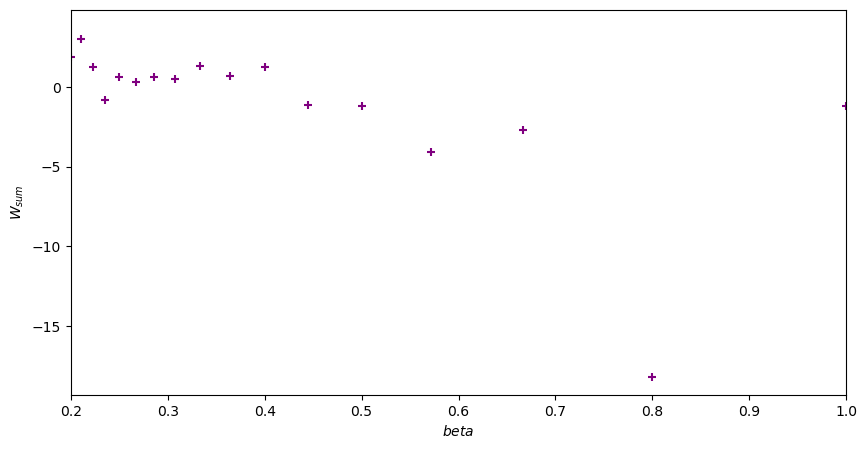

In [65]:
x = [x*0.25 for x in range(len(fc_weight_np_square_sum))]
y = fc_weight_np_square_sum

# x軸の値を逆数に変換
x_inverse = []
for val in x:
    if val != 0:
        x_inverse.append(1 / val)
    else:
        x_inverse.append(0)  # ゼロで割り算を避けるため

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x_inverse, y, marker='+', color='purple')
plt.xlabel('$beta$')
plt.ylabel('$W_{sum}$')

# x軸の範囲を指定
plt.xlim(0.2, 1) 

plt.show()